In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [8]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
import pandas as pd
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [10]:
data = {
    '真实标签':[1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0],
    '预测标签':[0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.30,0.1]
}
df = pd.DataFrame(data)
df.head(8)

,真实标签,预测标签
0,1,0.90
1,1,0.80
2,0,0.70
3,1,0.60
4,1,0.55
5,1,0.54
6,0,0.53
7,0,0.52


In [31]:
df_sorted = df.sort_values(by='预测标签',ascending=False)
cumulative_tp = df_sorted['真实标签'].cumsum()
cumulative_fp = ( 1 - df_sorted['真实标签']).cumsum()
total_tp=cumulative_tp.iloc[-1]
total_fp=cumulative_fp.iloc[-1]
fpr = cumulative_fp / total_fp
tpr = cumulative_tp / total_tp
roc_auc = auc(fpr,tpr)

In [43]:
fpr,tpr,df_sorted

(0     0.0
 1     0.0
 2     0.1
 3     0.1
 4     0.1
 5     0.1
 6     0.2
 7     0.3
 8     0.3
 9     0.4
 10    0.4
 11    0.5
 12    0.5
 13    0.6
 14    0.7
 15    0.8
 16    0.8
 17    0.9
 18    0.9
 19    1.0
 Name: 真实标签, dtype: float64,
 0     0.1
 1     0.2
 2     0.2
 3     0.3
 4     0.4
 5     0.5
 6     0.5
 7     0.5
 8     0.6
 9     0.6
 10    0.7
 11    0.7
 12    0.8
 13    0.8
 14    0.8
 15    0.8
 16    0.9
 17    0.9
 18    1.0
 19    1.0
 Name: 真实标签, dtype: float64,
     真实标签   预测标签
 0      1  0.900
 1      1  0.800
 2      0  0.700
 3      1  0.600
 4      1  0.550
 5      1  0.540
 6      0  0.530
 7      0  0.520
 8      1  0.510
 9      0  0.505
 10     1  0.400
 11     0  0.390
 12     1  0.380
 13     0  0.370
 14     0  0.360
 15     0  0.350
 16     1  0.340
 17     0  0.330
 18     1  0.300
 19     0  0.100)

In [27]:
roc_auc

0.68

In [29]:
roc_curve

<function sklearn.metrics._ranking.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)>

In [31]:
df_sorted

,真实标签,预测标签
0,1,0.900
1,1,0.800
2,0,0.700
3,1,0.600
4,1,0.550
5,1,0.540
6,0,0.530
7,0,0.520
8,1,0.510
9,0,0.505


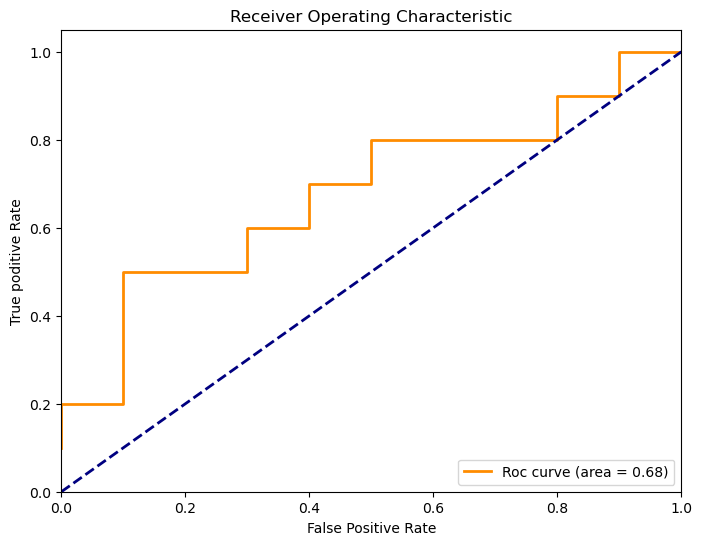

In [33]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange', lw=2, label='Roc curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True poditive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

In [37]:
x1 = torch.tensor(0.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)

def f(x1, x2):
    term1 = 3 * sigmoid(x1 ** 2 + 2 * x2 + 1)
    term2 = sigmoid(x1 ** 2 + 2 * x2 + 1)
    term3 = 1
    return sigmoid(term1 + term2 + term3)

In [39]:
y = f(x1, x2)

In [41]:
y.backward()

In [43]:
"x1 的梯度：", x1.grad

('x1 的梯度：', tensor(0.))

In [45]:
"x2 的梯度：", x2.grad

('x2 的梯度：', tensor(0.0029))